L

In this section, we start designing FIR filters using the windowing design method. This is the most straightforward design method.


In [45]:
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import firwin, freqz


In [50]:
# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = np.np.np.pi / 2 # Desired cutoff frequency, Hz
trans_width = 0.1 * np.pi # Width of transition from pass band to stop band, Hz
numtaps = 15 # Size of the FIR filter

## Low Pass Filter using Blackman window method

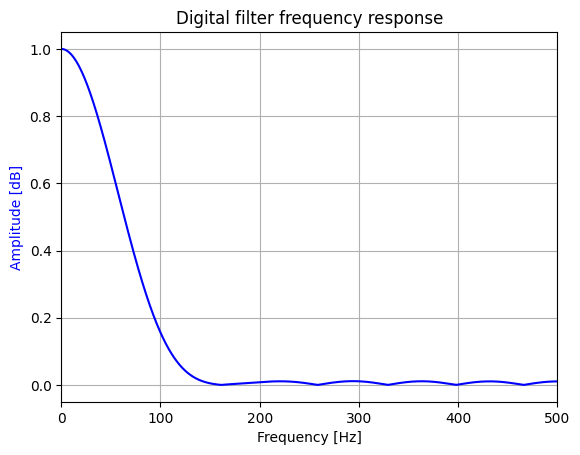

In [52]:
# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()

# Kaiser

The most popular window used for this method of filter design is the Kaiser-Bessel window because it provides extra parameters for tuning the frequency response. Let's consider a design example using Kaiser-Bessel and the filter design tools in the signal.fir_filter_design module.

The signal.fir_filter_design module provides functions for filter design using the Kaiser-Bessel window ( among other windows). For example, to design a lowpass filter using the Kaiser-Bessel window, we need the a subset of the following parameters: maximum passband ripple (
), width of the transition region, Kaiser-Bessel parameter 
, and the number of filter taps. The fir_filter_design provides tools to solve for some of these parameters given others. For example, the fir_filter_design.kaiserord() function can determine the number of taps given the maximum allowable passband ripple and the width of the transition region.

Consider the following low pass filter specification.

In [48]:
Ns =300 # number of samples 
N = 1024 # DFT size

fs = 1e3 # sample rate in Hz
fpass = 100 # in Hz
fstop = 150 # in Hz
delta = 60 # in dB, desired attenuation in stopband

C:\Users\darth\AppData\Local\Temp\ipykernel_15792\4128149955.py:1: DeprecationWarning: Please import `kaiserord` from the `scipy.signal` namespace; the `scipy.signal.fir_filter_design` namespace is deprecated and will be removed in SciPy 2.0.0.
  M, beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))


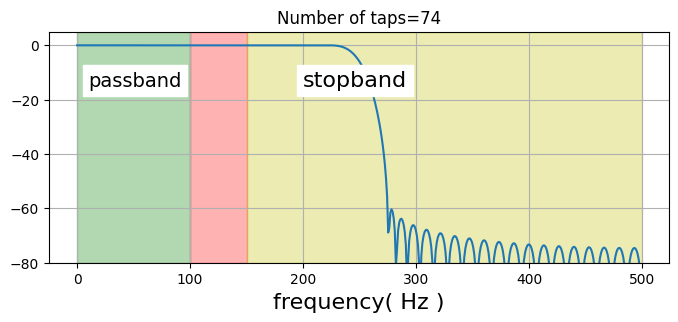

In [56]:
M, beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=True, fs=fs)

hn = firwin(numtaps = M,
            cutoff = (fstop+fpass)/2.,
            window=('kaiser', beta),
            fs=fs/2.)
w, H = freqz(hn) # frequency response

fig,ax = plt.subplots()
fig.set_size_inches((8,3))

ax.plot(w/np.pi * fs/2., 20 * np.log10(abs(H)))
ax.set_xlabel("frequency( Hz )",fontsize=16)
ax.set_ylabel(r"",fontsize=22)
ymin,ymax = -80,5
ax.axis(ymin = ymin,ymax=ymax)
ax.add_patch(Rectangle((0,ymin),width=fpass,height=ymax-ymin,color='g',alpha=0.3))
ax.add_patch(Rectangle((fpass,ymin),width=fstop-fpass,height=ymax-ymin,color='r',alpha=0.3))
ax.add_patch(Rectangle((fstop,ymin),width=fs/2-fstop,height=ymax-ymin,color='y',alpha=0.3))
ax.set_title("Number of taps=%d"%M)
ax.text(10,-15,'passband',fontsize=14,bbox=dict(color='white'))
ax.text(200,-15,'stopband',fontsize=16,bbox=dict(color='white'))
ax.grid()

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)